In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

df = pd.read_csv('RawData.csv', encoding='cp949')

# 🔧 한글 폰트 설정 (Windows 기준: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

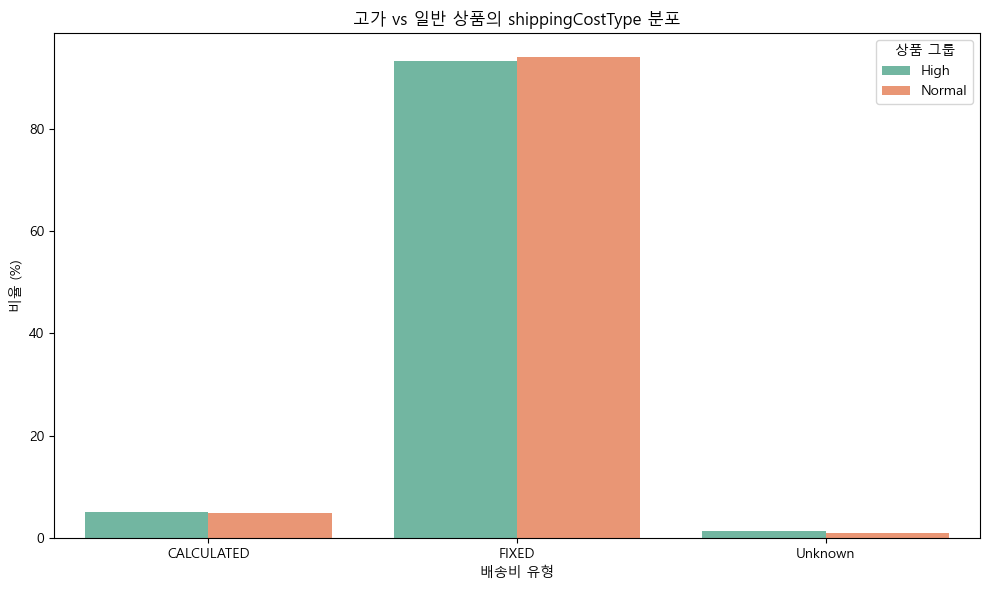

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 고가 상품 기준 (상위 10%)
price_threshold = df['price'].quantile(0.9)
df['priceGroup'] = df['price'].apply(lambda x: 'High' if x >= price_threshold else 'Normal')

# 2. shippingCostType 분포 계산
shipping_costtype_dist = df.groupby(['priceGroup', 'shippingCostType']).size().reset_index(name='count')

# ✅ 비율 계산 수정
shipping_costtype_dist['percent'] = (
    shipping_costtype_dist['count'] / 
    shipping_costtype_dist.groupby('priceGroup')['count'].transform('sum') * 100
).round(2)

# 3. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=shipping_costtype_dist, x='shippingCostType', y='percent', hue='priceGroup', palette='Set2')
plt.title('고가 vs 일반 상품의 shippingCostType 분포')
plt.ylabel('비율 (%)')
plt.xlabel('배송비 유형')
plt.legend(title='상품 그룹')
plt.tight_layout()
plt.show()


c:\Temp\ipykernel_21452\3847131603.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bubble_data = df.groupby(['priceGroup', 'shippingCostBin']).size().reset_index(name='count')


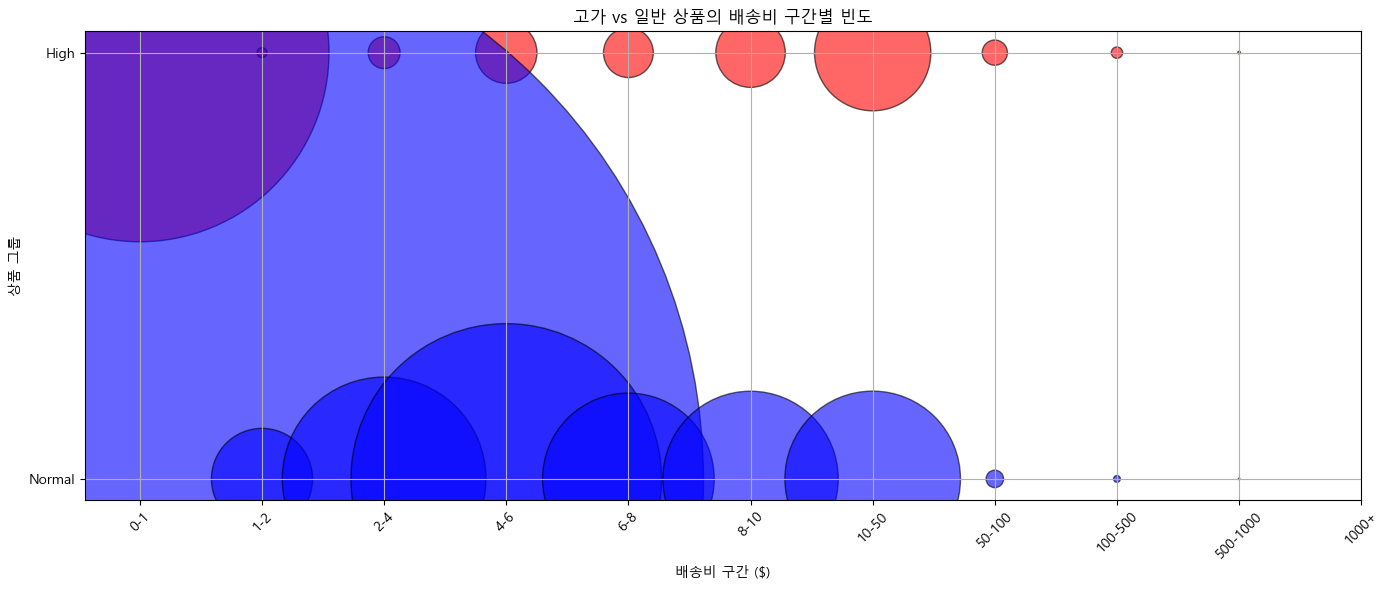

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 배송비 숫자형 변환
df['shippingCost'] = pd.to_numeric(df['shippingCost'], errors='coerce')

# 고가 상품 그룹 정의
price_threshold = df['price'].quantile(0.9)
df['priceGroup'] = df['price'].apply(lambda x: 'High' if x >= price_threshold else 'Normal')

# 배송비 구간 정의
custom_bins = [0, 1, 2, 4, 6, 8, 10, 50, 100, 500, 1000]
if df['shippingCost'].max() > 1000:
    custom_bins.append(df['shippingCost'].max() + 1)

custom_labels = ['0-1', '1-2', '2-4', '4-6', '6-8', '8-10', '10-50', '50-100', '100-500', '500-1000', '1000+']
df['shippingCostBin'] = pd.cut(df['shippingCost'], bins=custom_bins, labels=custom_labels[:len(custom_bins)-1], include_lowest=True)

# 그룹별 빈도 계산
bubble_data = df.groupby(['priceGroup', 'shippingCostBin']).size().reset_index(name='count')
bubble_data['x'] = bubble_data['shippingCostBin'].cat.codes
bubble_data['y'] = bubble_data['priceGroup'].map({'Normal': 0, 'High': 1})
bubble_data['color'] = bubble_data['priceGroup'].map({'Normal': 'blue', 'High': 'red'})

# 버블 차트 시각화
plt.figure(figsize=(14, 6))
plt.scatter(
    x=bubble_data['x'],
    y=bubble_data['y'],
    s=bubble_data['count'] * 1.2,
    alpha=0.6,
    c=bubble_data['color'],
    edgecolors='k'
)
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=45)
plt.yticks(ticks=[0, 1], labels=['Normal', 'High'])
plt.xlabel('배송비 구간 ($)')
plt.ylabel('상품 그룹')
plt.title('고가 vs 일반 상품의 배송비 구간별 빈도')
plt.grid(True)
plt.tight_layout()
plt.show()


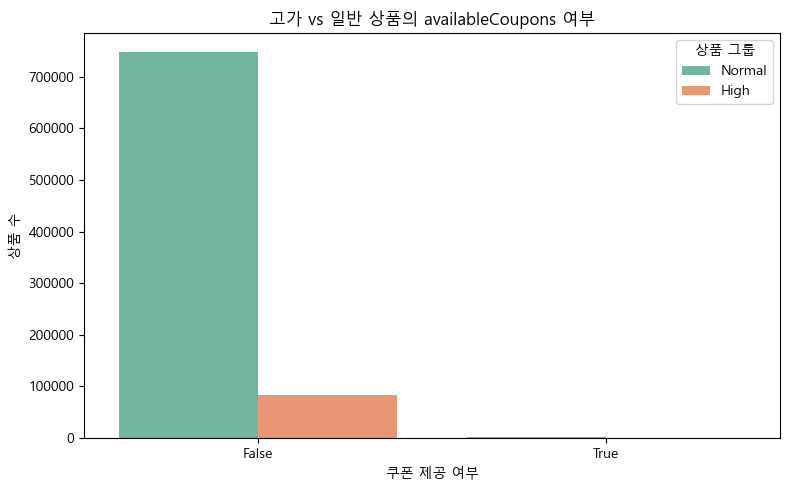

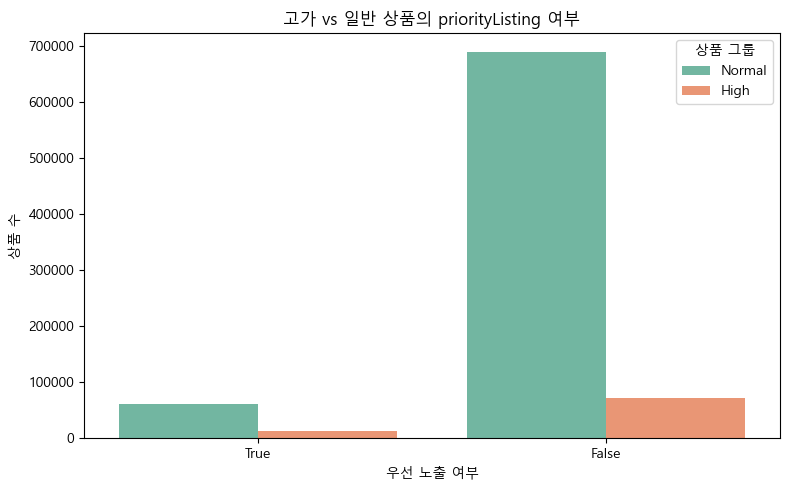

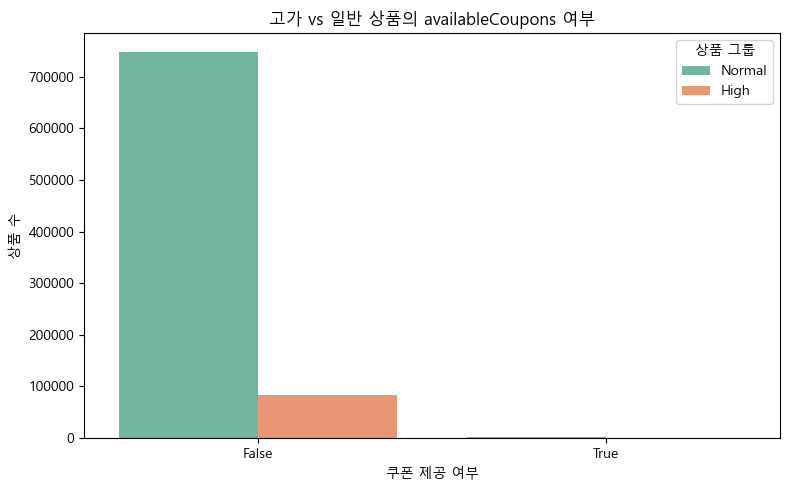

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 문자열 변환 (다시 실행 필요할 경우)
df['availableCoupons_str'] = df['availableCoupons'].astype(str)
df['priorityListing_str'] = df['priorityListing'].astype(str)

# Countplot 1: 쿠폰 제공 여부
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='availableCoupons_str', hue='priceGroup', palette='Set2')
plt.title('고가 vs 일반 상품의 availableCoupons 여부')
plt.xlabel('쿠폰 제공 여부')
plt.ylabel('상품 수')
plt.legend(title='상품 그룹')
plt.tight_layout()
plt.show()

# Countplot 2: 우선 노출 여부
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='priorityListing_str', hue='priceGroup', palette='Set2')
plt.title('고가 vs 일반 상품의 priorityListing 여부')
plt.xlabel('우선 노출 여부')
plt.ylabel('상품 수')
plt.legend(title='상품 그룹')
plt.tight_layout()
plt.show()


# 시각화 1: availableCoupons (Countplot)
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='availableCoupons_str',
    hue='priceGroup',
    palette='Set2'
)
plt.title('고가 vs 일반 상품의 availableCoupons 여부')
plt.xlabel('쿠폰 제공 여부')
plt.ylabel('상품 수')
plt.legend(title='상품 그룹')
plt.tight_layout()
plt.show()


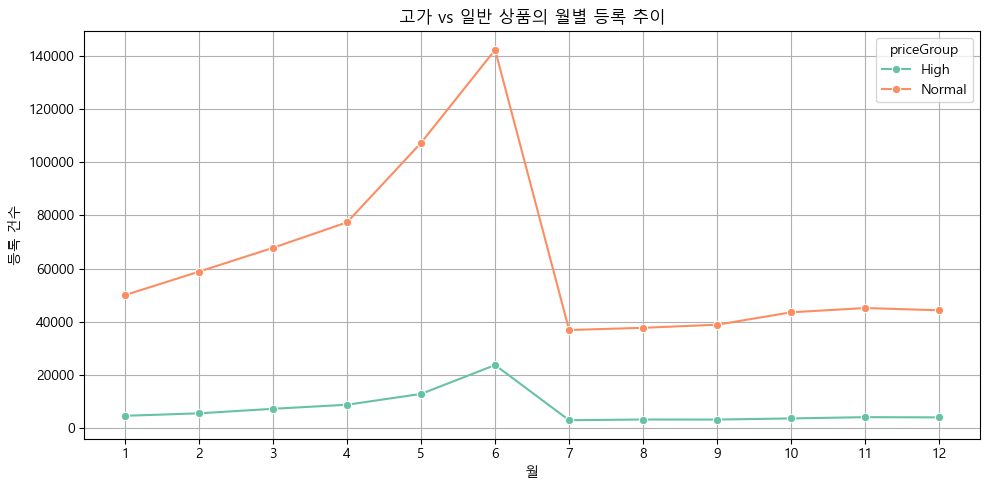

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 날짜 형식 변환
df['itemCreationDate'] = pd.to_datetime(df['itemCreationDate'], errors='coerce')

# 날짜에서 월과 요일 추출
df['month'] = df['itemCreationDate'].dt.month
df['weekday'] = df['itemCreationDate'].dt.dayofweek  # 0 = Monday
weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['weekday_name'] = df['weekday'].map(weekday_map)

# 고가 상품 기준 정의 (상위 10%)
price_threshold = df['price'].quantile(0.9)
df['priceGroup'] = df['price'].apply(lambda x: 'High' if x >= price_threshold else 'Normal')

# 📈 월별 등록 수
monthly_trend = df.groupby(['month', 'priceGroup']).size().reset_index(name='count')

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_trend, x='month', y='count', hue='priceGroup', marker='o', palette='Set2')
plt.title('고가 vs 일반 상품의 월별 등록 추이')
plt.xlabel('월')
plt.ylabel('등록 건수')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()


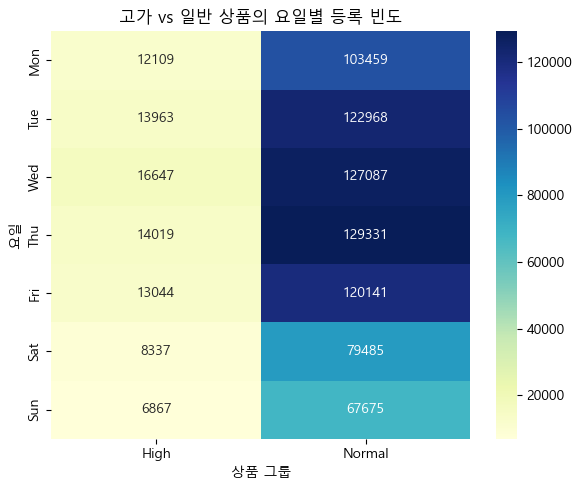

In [16]:
# 📊 요일별 등록 수 (히트맵)
heatmap_data = df.groupby(['weekday_name', 'priceGroup']).size().unstack().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('고가 vs 일반 상품의 요일별 등록 빈도')
plt.ylabel('요일')
plt.xlabel('상품 그룹')
plt.tight_layout()
plt.show()


In [17]:
df.columns

Index(['availableCoupons', 'bidCount', 'buyingOptions', 'categories',
       'condition', 'currentBidPrice', 'itemCreationDate', 'itemEndDate',
       'itemId', 'itemLocation', 'itemOriginDate', 'leafCategoryIds',
       'listingMarketplaceId', 'marketingPrice', 'price', 'priorityListing',
       'seller', 'shippingOptions', 'title', 'topRatedBuyingExperience',
       'discountPrice', 'discountRatio', 'feedbackPercentage', 'feedbackScore',
       'shippingCostType', 'shippingCost', 'category_Total', 'category_1',
       'category_2', 'priceGroup', 'shippingCostBin', 'availableCoupons_str',
       'priorityListing_str', 'month', 'weekday', 'weekday_name'],
      dtype='object')